In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score,classification_report,r2_score,confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.pipeline import Pipeline

In [64]:
slr_ds = pd.read_csv('./Datasets/exp_1_A.csv')
mlr_ds = pd.read_csv('./Datasets/exp_1_B.csv')
svm_ds = pd.read_csv('./Datasets/exp_2.csv')
rf_ds = pd.read_csv('./Datasets/exp_2.csv')
lgr_ds = pd.read_csv('./Datasets/exp_2.csv')
dbscan_ds = pd.read_csv('./Datasets/exp_5.csv')

## Simple linear regression

In [65]:
slr_ds.head()

YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0

In [66]:
X = slr_ds.iloc[:,:-1]
y = slr_ds.iloc[:,-1]

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 4)

In [68]:
slr_model = LinearRegression()
slr_model.fit(X_train,y_train)
y_pred = slr_model.predict(X_test)
print(f'R2 Score: {r2_score(y_test,y_pred)}')

R2 Score: 0.9504404484884267


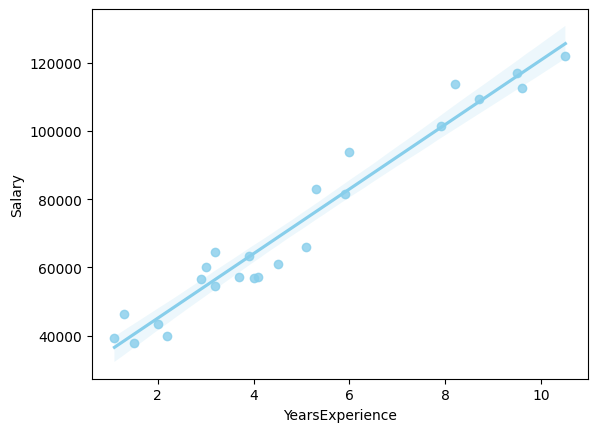

In [69]:
sns.regplot(x=X_train,y=y_train,color='skyblue')
plt.show()

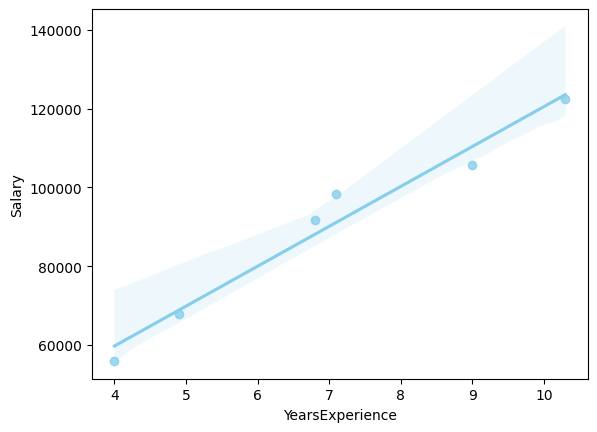

In [70]:
sns.regplot(x=X_test,y=y_test,color='skyblue')
plt.show()

## Multiple linear regression

In [71]:
mlr_ds.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [72]:
X = mlr_ds.iloc[:,:-1]
y = mlr_ds.iloc[:,-1]

In [73]:
scaling = ('scaler',StandardScaler(),[0,1,2])
encoding = ('ohe',OneHotEncoder(sparse_output=False,drop='first'),[3])
cols_transformation = ColumnTransformer(
    transformers = [
        scaling,
        encoding
    ],
    remainder='passthrough'
)

In [74]:
mlr_model = Pipeline([
    ('cols_tranform',cols_transformation),
    ('model',LinearRegression())
])

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
mlr_model.fit(X_train,y_train)
y_pred = mlr_model.predict(X_test)
print(f'R2 Score: {r2_score(y_test,y_pred)}')

R2 Score: 0.9783259006626639


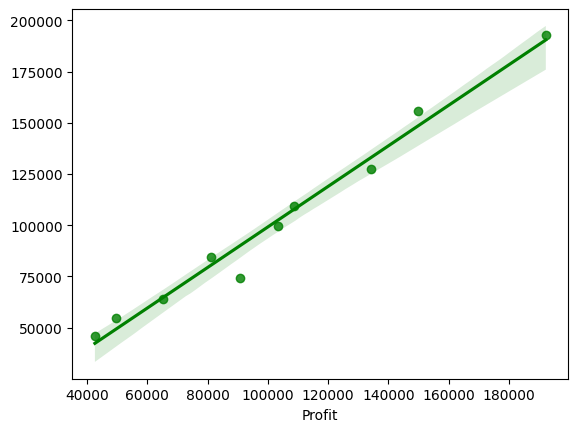

In [76]:
sns.regplot(x=y_test,y=y_pred,color='green')
plt.show()

## DBSCAN

In [77]:
dbscan_ds.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [78]:
dbscan_ds_new = dbscan_ds.drop(dbscan_ds.iloc[:,[0,1,2]],axis=1)

In [79]:
dbscan_ds_new.head()

Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

In [80]:
scaler = StandardScaler()
dbscan_ds_new_scaled = scaler.fit_transform(dbscan_ds_new)

In [81]:
dbscan_model = DBSCAN(eps=0.36,min_samples=3)
labels = dbscan_model.fit_predict(dbscan_ds_new_scaled)
print(f'Clusters: {len(set(labels))}')

Clusters: 8


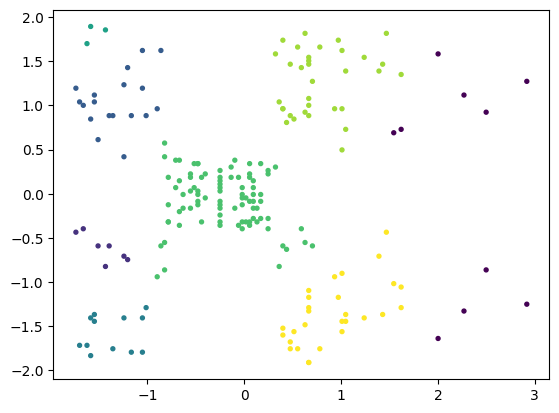

In [82]:
plt.scatter(dbscan_ds_new_scaled[:,0],dbscan_ds_new_scaled[:,1],c=labels,s=8)
plt.show()

## SVM

In [83]:
svm_ds.head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

In [84]:
X = svm_ds.iloc[:,:-1].values
y = svm_ds.iloc[:,-1].values

In [85]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train,y_train)

SVC(kernel='linear')

In [87]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        59
           1       0.78      0.86      0.82        21

    accuracy                           0.90        80
   macro avg       0.86      0.89      0.87        80
weighted avg       0.90      0.90      0.90        80



<Axes: >

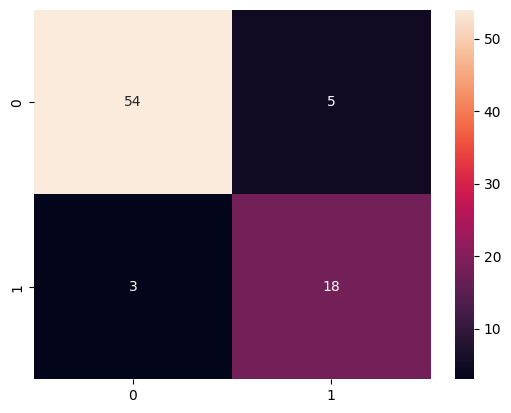

In [88]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

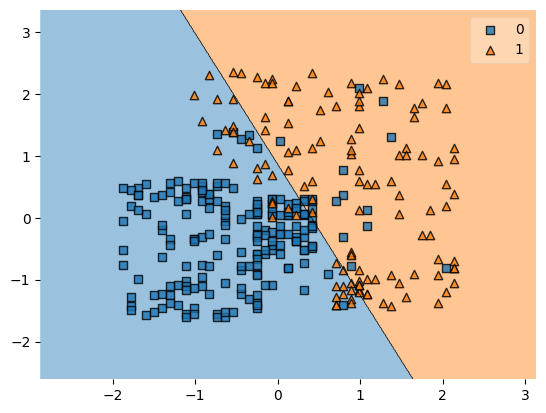

In [89]:
plot_decision_regions(X_train,y_train,clf=svm_model)
plt.show()

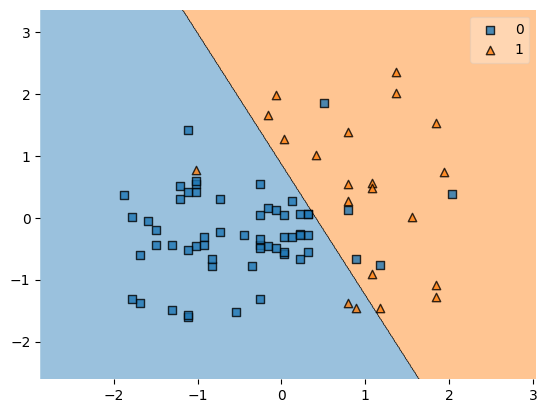

In [90]:
plot_decision_regions(X_test,y_test,clf=svm_model)
plt.show()